Dengan menggunakan dataset yang sama (‘https://dqlab-dataset.s3-ap-southeast1amazonaws.com/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers)
selama bulan Desember. Beberapa spesifikasi yang harus diperhatikan:
 Ukuran figure adalah 10x5
 Sumbu-x adalah tanggal pembelian, dari tanggal 1–31 Desember 2019
 Sumbu-y adalah jumlah unique customers di tiap tanggal
 Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

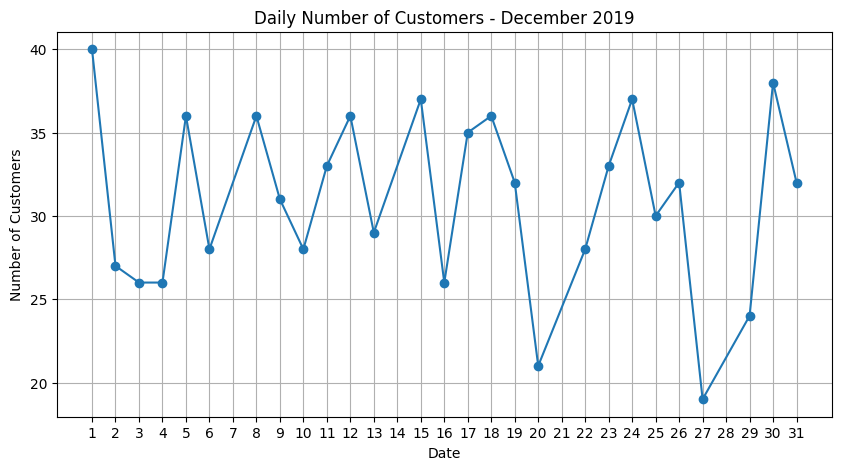

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom 'order_date' menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data untuk bulan Desember 2019
december_data = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah unique customers di tiap tanggal
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart
plt.figure(figsize=(10, 5))
daily_customers.plot(kind='line', marker='o')
plt.title('Daily Number of Customers - December 2019')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()


Case 1: Menentukan brand top 5
Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu dilakukan. Silahkan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight
tambahan.

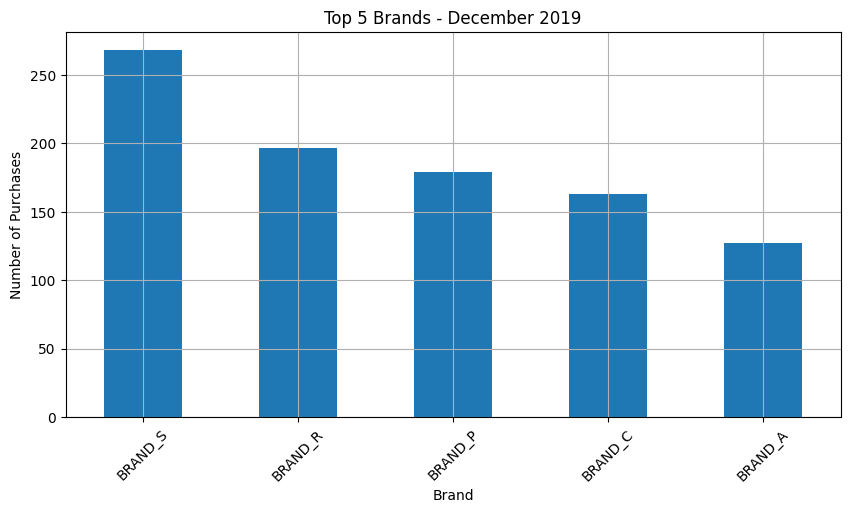

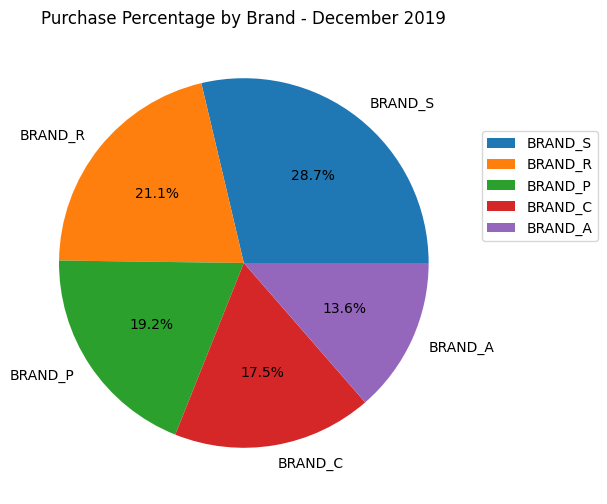

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom 'order_date' menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data untuk bulan Desember 2019
december_data = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah pembelian per brand
brand_counts = december_data['brand'].value_counts().head(5)

# Membuat bar chart untuk top 5 brands
plt.figure(figsize=(10, 5))
brand_counts.plot(kind='bar')
plt.title('Top 5 Brands - December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menampilkan persentase dari total pembelian
total_purchases = december_data.shape[0]
brand_percentages = (brand_counts / total_purchases) * 100

# Membuat pie chart untuk persentase pembelian per brand
plt.figure(figsize=(6, 6))
brand_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.title('Purchase Percentage by Brand - December 2019')
plt.ylabel('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.8))
plt.show()


Case 1:
Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut!
Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [50]:
import pandas as pd

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom order_date menjadi datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data penjualan bulan Desember 2019
dec_data = data[(data['order_date'].dt.year == 2019) & (data['order_date'].dt.month == 12)]

# Menghitung jumlah quantity per brand
brand_quantity = dec_data.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan berdasarkan quantity terbanyak
top5_brands = brand_quantity.nlargest(5, 'quantity')

# Menampilkan tabel top 5 brands dan jumlah quantity terjual
print(top5_brands)


     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


Case 2: Multi-line chart daily quantity untuk brand top 5
Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.

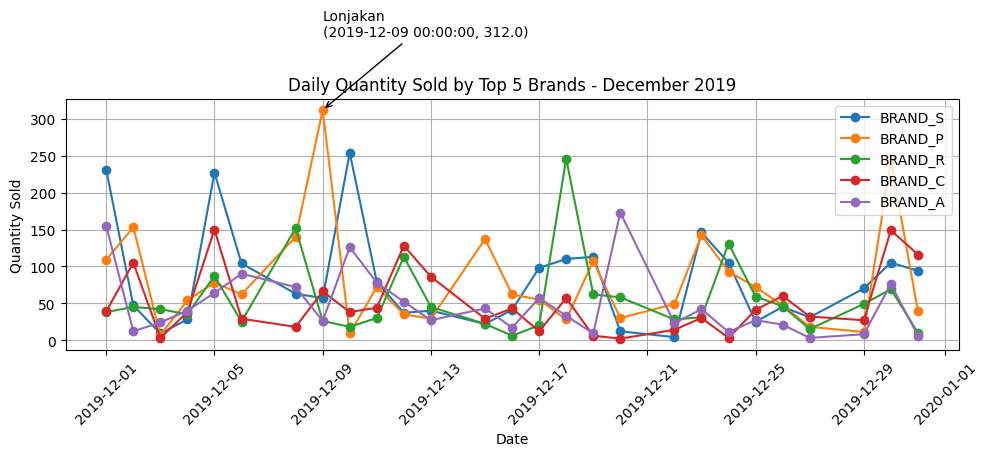

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom 'order_date' menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data untuk bulan Desember 2019
december_data = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah quantity terjual per brand per tanggal
daily_quantity = december_data.groupby(['order_date', 'brand'])['quantity'].sum().unstack()

# Mengambil top 5 brand teratas berdasarkan total quantity
top_5_brands = daily_quantity.sum().nlargest(5).index

# Memilih hanya data brand yang termasuk top 5
daily_quantity_top_5 = daily_quantity[top_5_brands]

# Membuat multi-line chart
plt.figure(figsize=(10, 5))
for brand in daily_quantity_top_5.columns:
    plt.plot(daily_quantity_top_5.index, daily_quantity_top_5[brand], marker='o', label=brand)

# Menentukan titik lonjakan
max_quantity = daily_quantity_top_5.max()
lonjakan_brand = max_quantity.idxmax()
lonjakan_date = daily_quantity_top_5.index[daily_quantity_top_5[lonjakan_brand] == max_quantity.max()].tolist()[0]
lonjakan_value = max_quantity.max()

# Menambahkan anotasi pada titik lonjakan
plt.annotate(f'Lonjakan\n({lonjakan_date}, {lonjakan_value})',
             xy=(lonjakan_date, lonjakan_value),
             xytext=(lonjakan_date, lonjakan_value + 100),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             textcoords='data')

# Menambahkan judul, label sumbu-x dan sumbu-y, serta legenda
plt.title('Daily Quantity Sold by Top 5 Brands - December 2019')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)

# Memutar label pada sumbu-x
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Case 3:
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak

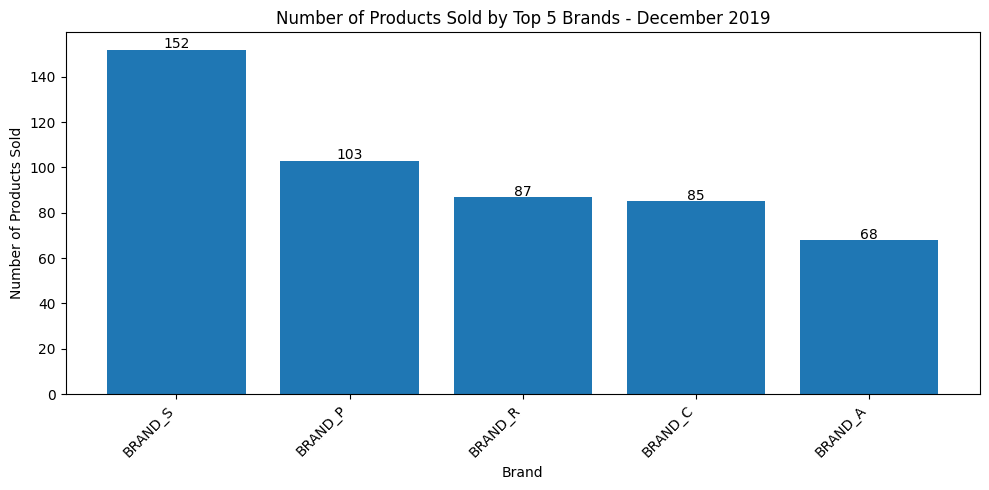

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom 'order_date' menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data untuk bulan Desember 2019
december_data = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah produk terjual per brand
product_count = december_data.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

# Mengambil top 5 brand teratas berdasarkan jumlah produk terjual
top_5_brands = product_count.head(5)

# Membuat bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5_brands.index, top_5_brands.values)

# Menambahkan label pada bar chart
for i, v in enumerate(top_5_brands.values):
    plt.text(i, v + 0.5, str(v), ha='center')

# Menambahkan judul dan label sumbu-x dan sumbu-y
plt.title('Number of Products Sold by Top 5 Brands - December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products Sold')

# Memutar label pada sumbu-x
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019
Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 dibulan Desember 2019. Apakah ada pola yang menarik?

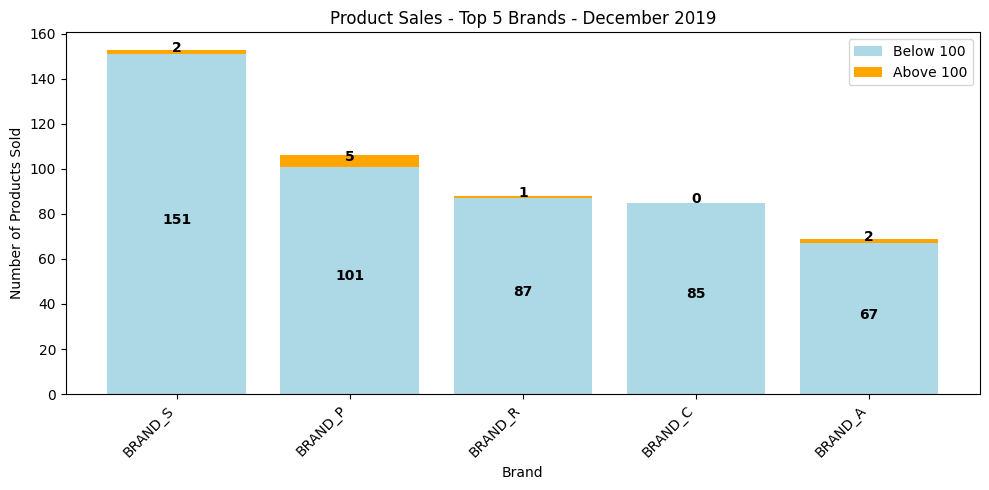

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom 'order_date' menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data untuk bulan Desember 2019
december_data = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung jumlah produk terjual per brand
product_count = december_data.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

# Menghitung jumlah produk terjual >= 100 dan < 100
above_100 = december_data[december_data['quantity'] >= 100].groupby('brand')['product_id'].nunique()
below_100 = december_data[december_data['quantity'] < 100].groupby('brand')['product_id'].nunique()

# Menggabungkan data di atas menjadi satu DataFrame
product_sales = pd.DataFrame({'Above 100': above_100, 'Below 100': below_100}).fillna(0)

# Mengurutkan DataFrame berdasarkan jumlah produk terjual
product_sales = product_sales.reindex(product_count.index)

# Mengambil top 5 brand teratas
top_5_brands = product_sales.head(5)

# Membuat stacked bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5_brands.index, top_5_brands['Below 100'], label='Below 100', color='lightblue')
plt.bar(top_5_brands.index, top_5_brands['Above 100'], bottom=top_5_brands['Below 100'], label='Above 100', color='orange')

# Menambahkan label pada stacked bar chart
for i, (below, above) in enumerate(zip(top_5_brands['Below 100'], top_5_brands['Above 100'])):
    plt.text(i, below/2, str(int(below)), ha='center', color='black', weight='bold')
    plt.text(i, below + above/2, str(int(above)), ha='center', color='black', weight='bold')

# Menambahkan judul dan label sumbu-x dan sumbu-y
plt.title('Product Sales - Top 5 Brands - December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products Sold')

# Memutar label pada sumbu-x
plt.xticks(rotation=45, ha='right')

# Menambahkan legenda
plt.legend()

plt.tight_layout()
plt.show()


Case 5: Murah atau mahalkah harga produk brand top 5
Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?

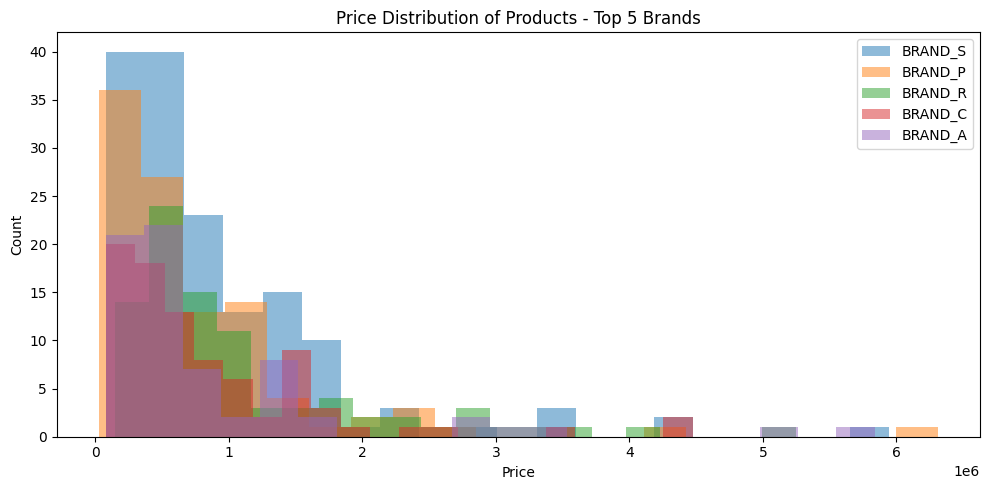

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Mengubah kolom 'order_date' menjadi tipe data datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Mengambil data untuk bulan Desember 2019
december_data = data[(data['order_date'].dt.month == 12) & (data['order_date'].dt.year == 2019)]

# Menghitung median harga per produk
median_prices = december_data.groupby(['brand', 'product_id'])['item_price'].median()

# Mengambil top 5 brand berdasarkan jumlah produk terjual
top_5_brands = december_data.groupby('brand')['product_id'].nunique().nlargest(5).index

# Membuat histogram untuk tiap brand
plt.figure(figsize=(10, 5))
for brand in top_5_brands:
    brand_prices = median_prices[brand]
    plt.hist(brand_prices, bins=20, alpha=0.5, label=brand)

# Menambahkan judul dan label sumbu-x dan sumbu-y
plt.title('Price Distribution of Products - Top 5 Brands')
plt.xlabel('Price')
plt.ylabel('Count')

# Menambahkan legenda
plt.legend()

plt.tight_layout()
plt.show()


Case 6a: Korelasi quantity vs GMV
Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?


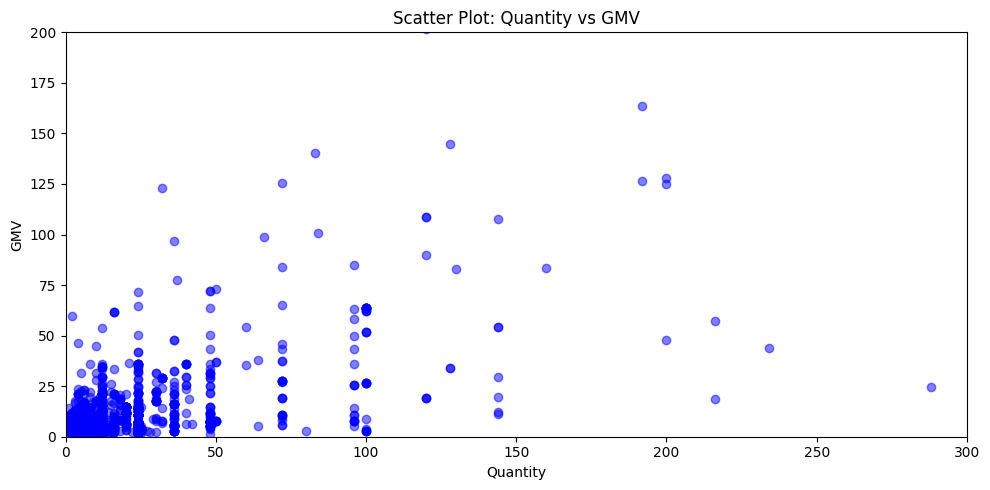

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Menghitung GMV (quantity * item_price) per product_id
data['GMV'] = data['quantity'] * data['item_price']

# Menghitung median harga per product_id
median_prices = data.groupby('product_id')['item_price'].median()
median_prices = median_prices.rename('median_price').reset_index()

# Menggabungkan median_prices dengan data quantity
merged_data = pd.merge(data, median_prices, on='product_id')

# Membuat scatter plot quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(data['quantity'], data['GMV'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

plt.tight_layout()
plt.show()


Case 6b: Korelasi median harga vs quantity
Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

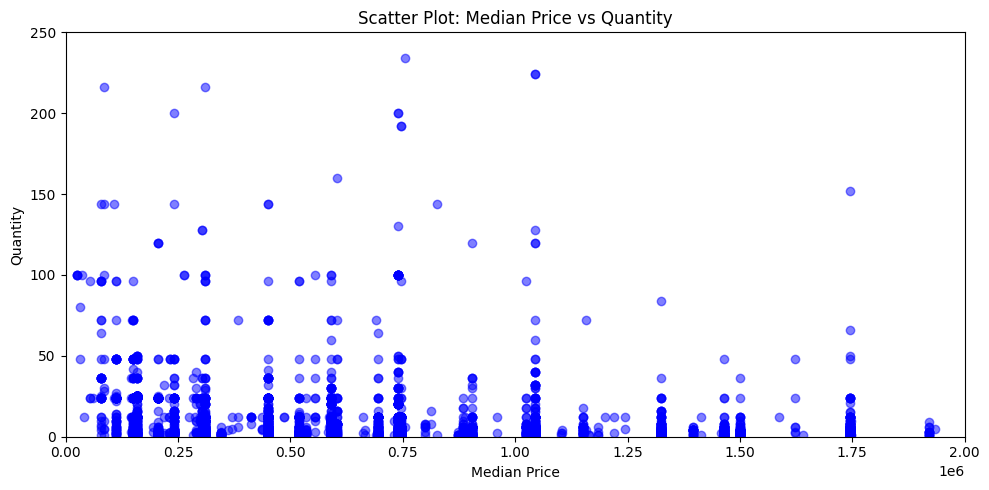

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Menghitung GMV (quantity * item_price) per product_id
data['GMV'] = data['quantity'] * data['item_price']

# Menghitung median harga per product_id
median_prices = data.groupby('product_id')['item_price'].median()
median_prices = median_prices.rename('median_price').reset_index()

# Menggabungkan median_prices dengan data quantity
merged_data = pd.merge(data, median_prices, on='product_id')

# Membuat scatter plot median harga vs quantity dengan skala logaritmik pada sumbu x
plt.figure(figsize=(10, 5))
plt.scatter(merged_data['median_price'], merged_data['quantity'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Median Price vs Quantity')
plt.xlabel('Median Price')
plt.ylabel('Quantity')
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)

plt.tight_layout()
plt.show()
